<a href="https://colab.research.google.com/github/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Modelagem_para_Diagn%C3%B3stico_de_Dados_Cl%C3%ADnicos_com_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnóstico de Dados Clínicos com Machine Learning

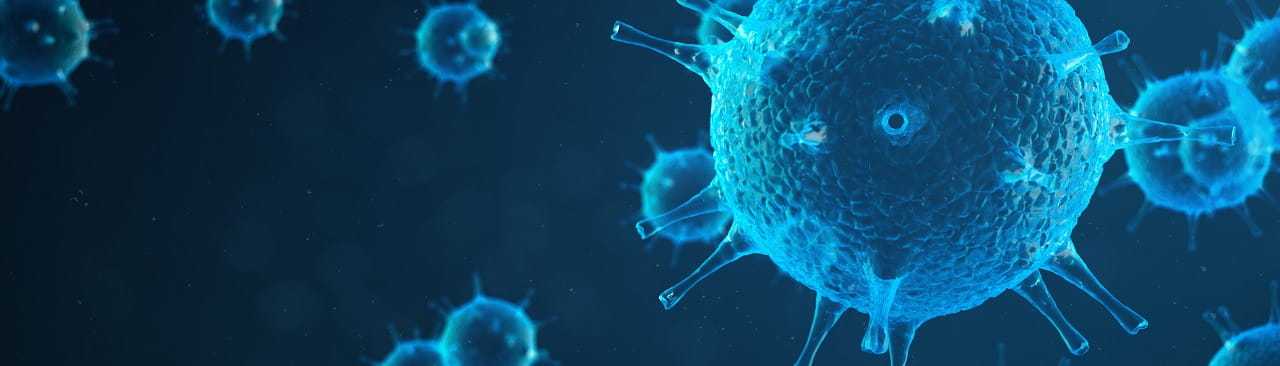

Bootcamp Data Science Alura

Autor: Rodrigo de Mendonça

e-mail: rodrigodemend@gmail.com

Este é o projeto final do Bootcamp Data Science da Alura! Nele eu pude demonstrar todo o conhecimento adquirido durante o Bootcamp, aplicando em um caso real de dados disponibilizados pelo hospital Sírio-Libanês. O principal objetivo é a construção de um modelo de machine learning capaz de detectar quais pacientes do hospital Sírio-Libanês que foram internados, irão agravar seus casos e precisarão de leito de UTI.

## Descrição do Problema

A pandemia do COVID-19 sobrecarregou o sistema de saúde, que não estava preparado para uma demanda tão grande de leitos de UTI, profissionais capacitados, equipamentos de proteção individual, entre outros recursos. Com recursos escassos, ter em mãos a previsão de quais pacientes irão precisar utilizar esses recursos é de suma importância.

A partir do momento em que o paciente é internado no hospital Sírio-Libanês, ele(a) terá o acompanhamento dos sinais vitais e será submetido a exames de sangue. Unindo essas informações com as informações demográficas e grupo de doenças prévias do paciente, iremos prever se o paciente irá ter seu caso agravado e precisará utlizar leitos de UTI. Essa previsão deve ser o mais rápido possível, dando tempo para que os recursos da UTI possam ser organizados ou a transferência de pacientes possa ser agendada.

Agora que já temos ciência do problema que iremos resolver, vamos botar a mão na massa!!

# Bibliotecas

O primeiro passo em qualquer projeto de machine learning é a importação das bibliotecas que serão utilizadas no projeto.

Nós iremos utilizar bibliotecas comumente usadas em projeto de machine learning como pandas, numpy, sklearn, matplotlib, seaborn, etc.

## Bibliotecas Utilizadas

Aqui nós temos a lista de todas as bibliotecas utilizadas nesse projeto e suas respectivas versões:


*   pandas (V.1.1.5)
*   numpy (V.1.19.5)
*   matplotlib (V.3.2.2)
*   seaborn (V.0.11.2)
*   sklearn (V.1.0.2)
*   imblearn (V.0.8.1)
*   feature_engine (V.1.2.0)
*   mlxtend (V.0.14.0)
*   skopt (V.0.9.0)
*   joblib (V.1.1.0)

## Bibliotecas que não vem por padrão no Google Colab

Aqui nós temos algumas instalações de bibliotecas que não vem por padrão no Google Colab.

In [1]:
# feature_engine
!pip install feature_engine

# scikit-optimize
!pip install scikit-optimize

# mlxtend
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

## Importação das Biblitecas

Como forma de organização, separamos a importação das bibliotecas comentando para qual finalidade estamos importando aquela biblioteca.

In [2]:
# Manipulação dos Dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de variáveis categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Pré processamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from imblearn.over_sampling import SMOTENC

# Seleção de Variáveis
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import SmartCorrelatedSelection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Validação 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Métricas
from sklearn.metrics import roc_auc_score

# Otimização de Hiperparâmetros
from skopt.plots import plot_convergence
from skopt import gp_minimize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Salvando os modelos
from joblib import dump, load

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Funções Utilizadas

Aqui, irei fazer a importação de um notebook tem como objetivo reunir todas as funções criadas durante o desenvolvimento do projeto. 

Criei um notebook separado para essas funções para que o projeto fique mais limpo e organizado.

Caso tenha interesse, é possível acessar o notebook clicando [aqui](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Funcoes_utilizadas.ipynb).

Clonando o repositório.

In [ ]:
!git clone https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning

Rodando o notebook com as funções.

In [ ]:
%run '/content/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/Notebooks/Funcoes_utilizadas.ipynb'

# Importação dos Dados - FAZER**********

In [5]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Cleaned/cleaned_data.csv',
                    sep =',')
dados.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0,0,0,0,1,1,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.994912,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0,0,0,0,0,0,0,1,1,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,-0.972789,...,-0.978029,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,-0.935113,...,-1.000000,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,10th,0,0,0,0,0,0,0,0,0,1

# Exploração dos Dados e Engenharia de Atributos

Antes de pensar em criar um modelo preditivo, temos que primeiro fazer a engenharia de atributos que consiste em sua maioria de fazer uma análise exploratória nos dados e buscar por possíveis atributos que poderemos passar para nosso modelo aprender qual paciente irá para UTI e qual paciente não irá.

Além de buscar por novos atributos escondidos nos dados, também iremos ajustar as escalas para que nosso modelo não de preferência para um atributo apenas porque está em uma escala diferente.


## Balaceamento dos Dados

Nosso projeto consiste em construir um modelo capaz de prever se um paciente internado no hospital Sírio-Libanês irá agravar seu caso e irá para a UTI ou se essa paciente não precisará de UTI. Portanto, estamos trabalhando com um problema de classificação de 2 classes.

Com isso em mente, o balanceamento dos dados é algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poderá prever tudo para essa classe e mesmo assim ele ainda terá uma suposta boa avaliação de performace.

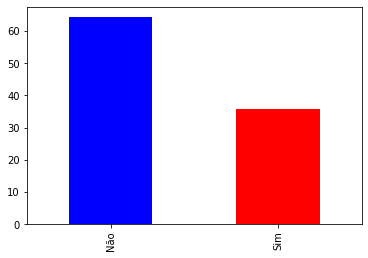

In [6]:
# Dicionário para visualização das labels
dict_grafico_dados_desbalanceados = {0:'Não', 1:'Sim'}

# Visualizando gráficamente o desbalanceamento dos dados
round(dados['ICU'].map(dict_grafico_dados_desbalanceados).value_counts(normalize=True)*100, 2).plot.bar(color=['b', 'r'])


# Podemos ver que não temos dados balanceados
#sns.countplot(dados['ICU'])


## Pacientes acima dos 65 anos

In [7]:
dados['AGE_ABOVE65'].value_counts(normalize=True)

0    0.588435
1    0.411565
Name: AGE_ABOVE65, dtype: float64

Temos 41% dos pacientes acima dos 65 anos, isso comprova que o virus está afetando principalmente a população mais idosa.

In [8]:
# Visualizando uma tabela cruzada
pd.crosstab(dados['AGE_ABOVE65'], dados['ICU'], rownames=['AGE_ABOVE65'], colnames=['ICU'])

ICU,0,1
AGE_ABOVE65,,
0,128,45
1,61,60


Conseguimos ver que o fato do paciente ser acima de 65 não diz muito se ele vai ou não para a UCI, porém o fato dele ter menos de 65% diz que ele tem grandes chances de não ir. Portanto essa será uma boa feature para nosso modelo.

Como essa feature já está codificada, não precisamos fazer nenhum tratamento antes de passar para o modelo.

## Percentil da Idade

Primeiramente, como essa feature é uma feature categórica ordinaria, ou seja, a ordem importa, irei realizar o Label Encoder para que o modelo consiga ver a ordem de importância nessa feature.

In [9]:
# Instanciando o objeto
le = LabelEncoder()

# "Treinando" o label encoder
le.fit(dados['AGE_PERCENTIL'])

# Realizando o mapeamento do label encoder
dados['AGE_PERCENTIL_LE'] = le.transform(dados['AGE_PERCENTIL'])

# Visualizando o resultado do Encoding
pd.DataFrame({"AGE_PERCENTIL": dados['AGE_PERCENTIL'].unique(), 
              "AGE_PERCENTIL_LE": dados['AGE_PERCENTIL_LE'].unique()}).sort_values('AGE_PERCENTIL_LE')

,AGE_PERCENTIL,AGE_PERCENTIL_LE
1,10th,0
4,20th,1
7,30th,2
2,40th,3
5,50th,4
0,60th,5
3,70th,6
6,80th,7
8,90th,8
9,Above 90th,9


Agora, vamos analisar um pouco mais a fundo como está distribuido os pacientes que foram ou não para o ICU em relação a idade percentil.

In [10]:
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['AGE_PERCENTIL'], dados['ICU'], rownames=['AGE_PERCENTIL'], colnames=['ICU'])
# Criando uma coluna com a diferença entre pacientes que foram e que não foram para ICU
freq['diff'] = freq[0] - freq[1]
freq

ICU,0,1,diff
AGE_PERCENTIL,,,
10th,30,6,24
20th,31,7,24
30th,23,11,12
40th,25,8,17
50th,18,13,5
60th,17,11,6
70th,17,13,4
80th,12,14,-2
90th,8,12,-4


Fazer um gráfico bonito separando em 3 cores que serão as 3 categorias que irei criar

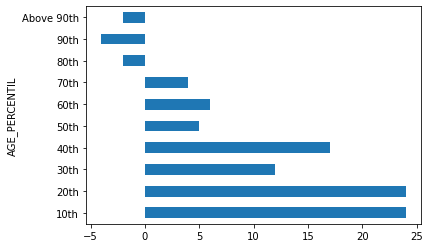

In [11]:
freq['diff'].plot.barh()

Fizemos a diferença do número de pacientes que não foram para o ICU e o número de pacientes que foram para o ICU por cada percentil de idade. O resultado nós podemos interpretar sendo que quanto maior o valor, mais os pacientes nesse percentil de idade não vão para o ICU.

Analisando o gráfico, podemos ver que dos 10th até os 40th a grande maioria dos pacientes não vão para o ICU, portanto iremos agrupar essas categorias. Seguindo o mesmo raciocinio também vamos agrupar os pacientes de 50th até 70th e os pacientes de 80th até Above 90th.

In [12]:
# Definindo o dicionário de mapeamento
dict_group_map = {
    '10th': 0,
    '20th': 0,
    '30th': 0,
    '40th': 0,
    '50th': 1,
    '60th': 1,
    '70th': 1,
    '80th': 2,
    '90th': 2,
    'Above 90th': 2,
}

# Realizando o encoding da feature e gerando a nova feature AGE_PERCENTIL_LE_2
dados['AGE_PERCENTIL_LE_2'] = dados['AGE_PERCENTIL'].map(dict_group_map)

# Visualizando o resultado do Encoding
pd.DataFrame(list(dict_group_map.items()), columns=['AGE_PERCENTIL', 'AGE_PERCENTIL_LE_2'])

,AGE_PERCENTIL,AGE_PERCENTIL_LE_2
0,10th,0
1,20th,0
2,30th,0
3,40th,0
4,50th,1
5,60th,1
6,70th,1
7,80th,2
8,90th,2
9,Above 90th,2


Como uma alternativa, podemos utilizar o método One Hot Encoding para criar uma coluna para cada categoria diferente dessa feature e poder passar essas informações de um outro ângulo para nosso modelo.

In [13]:
# Criando o One Hot Encoder para o AGE_PERCENTIL
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = onehotencoder.categories_[0].tolist()
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Criando o One Hot Encoder para o AGE_PERCENTIL_LE_2
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL_LE_2']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = ['AGE_PERCENTIL_LE_2_'+str(i) for i in onehotencoder.categories_[0].tolist()]
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

,AGE_PERCENTIL_LE_2_0,AGE_PERCENTIL_LE_2_1,AGE_PERCENTIL_LE_2_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
289,1.0,0.0,0.0
290,0.0,0.0,1.0
291,0.0,1.0,0.0
292,1.0,0.0,0.0


In [15]:
dados.shape

(294, 244)

Após a criação dessas novas features que irão ajudar nosso modelo de previsão, vamos remover a coluna AGE_PERCENTIL, pois ela não será mais necessária e já temos as informações dessa coluna nas duas features criadas.

In [16]:
# Removendo a feature AGE_PERCENTIL uma vez que já criamos duas novas features a partir do encoding desta
dados = dados.drop(['AGE_PERCENTIL'], axis=1)

In [17]:
# Selecionando asnovas colunas criadas pelo One Hot Encoding
col_float_to_int = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th', 'AGE_PERCENTIL_LE_2_0', 'AGE_PERCENTIL_LE_2_1', 'AGE_PERCENTIL_LE_2_2']

# Transformando as novas colunas criadas pelo One Hot Encoding em int64
for coluna in col_float_to_int:
  dados[coluna] = dados[coluna].astype('int64')


## Gênero

In [18]:
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['GENDER'], dados['ICU'], rownames=['GENDER'], colnames=['ICU'])
freq

ICU,0,1
GENDER,,
0,107,74
1,82,31


In [19]:
# Visualizando apenas o gênero 0 em percentual (%)
(freq.loc[0,] / sum(freq.loc[0,])) * 100

ICU
0    59.116022
1    40.883978
Name: 0, dtype: float64

In [20]:
# Visualizando apenas o gênero 1 em percentual (%)
(freq.loc[1,] / sum(freq.loc[1,])) * 100

ICU
0    72.566372
1    27.433628
Name: 1, dtype: float64

Apesar de termos dados desbalanceados e a maioria dos pacientes não terem ido para ICU, nós podemos ver que o gênero 1 tem uma pré-disposição menor a ir para o ICU, isso nós diz que essa pode ser uma feature importante para nosso modelo conseguir diferenciar os pacientes.

## Grupos de Doenças

Como primeiro passo, iremos criar uma nova feature que informará o modelo caso o paciente esteja em algum dos grupos de doença.

In [21]:
# Criando uma nova feature que informa se o paciente está em algum grupo de doença
dados['Pacient_is_any_DISEASE_GROUPING'] = [1 if (dados['DISEASE GROUPING 1'][i] == 1 or dados['DISEASE GROUPING 2'][i] == 1 or dados['DISEASE GROUPING 3'][i] == 1 or dados['DISEASE GROUPING 4'][i] == 1 or dados['DISEASE GROUPING 5'][i] == 1) else 0 for i in range(len(dados))]

In [22]:
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['Pacient_is_any_DISEASE_GROUPING'], dados['ICU'], rownames=['Pacient_is_any_DISEASE_GROUPING'], colnames=['ICU'])
freq

ICU,0,1
Pacient_is_any_DISEASE_GROUPING,,
0,156,74
1,33,31


Quando olhamos para os pacientes sem o DISEASE GROUPING, percebemos que todos seguem o mesmo padrão de 65% não irem para o ICU e 35% que vão. Porém isso seria o resultado esperado uma vez que nossa base também segue essa mesma proporção onde 65% dos pacientes não vão para ICU e 35% vão.

Olhando para os pacientes que tem o DISEASE GROUPING, podemos ver que temos algo mais perto do 50% - 50%, que nos diz que se o paciente pertence ao algum grupo de DISEASE GROUPING, ele terá mais chance de ir para na ICU.

## Tentando resolver a diferenciação dos pacientes acima de 65 anos

Como seria muito importante nosso modelo conseguir diferenciar as pessoas acima de 65 anos que vão para ICU. Vamos ver se pela diferença de gênero nessa faixa etária faz alguma diferença. Isso pode nós ajudar a criar uma feature que pode ser muito preditiva para esses pacientes.

In [23]:
# Visualizando uma tabela cruzada
pd.crosstab(dados['AGE_ABOVE65'], dados['ICU'], rownames=['AGE_ABOVE65'], colnames=['ICU'])

ICU,0,1
AGE_ABOVE65,,
0,128,45
1,61,60


Como podemos ver na tabela acima, as pessoas acima de 65 anos tem praticamente 50% de chance de ir para a ICU.

Vamos tentar criar uma tabela de frequência por gênero olhando apenas os pacientes acima de 65 anos:

In [24]:
# Filtrando apenas os pacientes acima de 65 anos
dados_com_pacientes_acima_de_65 = dados[dados['AGE_ABOVE65'] == 1]
# Criando a tabela de frequência
freq = pd.crosstab(dados_com_pacientes_acima_de_65['GENDER'], dados_com_pacientes_acima_de_65['ICU'], rownames=['GENDER'], colnames=['ICU'])
freq

ICU,0,1
GENDER,,
0,34,38
1,27,22


Como podemos ver o gênero não seria um fator determinante nessa faixa etária para saber se o paciente irá para o ICU ou não.

Vamos agora testar se o paciente irá para ICU estando em algum grupo de doença e acima de 65 anos.

In [25]:
freq = pd.crosstab(dados_com_pacientes_acima_de_65['Pacient_is_any_DISEASE_GROUPING'], dados_com_pacientes_acima_de_65['ICU'], rownames=['Pacient_is_any_DISEASE_GROUPING'], colnames=['ICU'])
# Fazendo a tabela em termos percentuais em relação ao grupo com DISEASE GROUPING e ao grupo sem
salvando_resultado_Diasease_False = list((freq.loc[0,] / sum(freq.loc[0,])) * 100)
salvando_resultado_Diasease_True = list((freq.loc[1,] / sum(freq.loc[1,])) * 100)
freq.loc[0,0] = salvando_resultado_Diasease_False[0]
freq.loc[0,1] = salvando_resultado_Diasease_False[1]
freq.loc[1,0] = salvando_resultado_Diasease_True[0]
freq.loc[1,1] = salvando_resultado_Diasease_True[1]
freq

ICU,0,1
Pacient_is_any_DISEASE_GROUPING,,
0,54.054054,45.945946
1,44.680851,55.319149


Podemos ver que agora conseguimos ver uma diferença. Os paciente acima de 65 anos que estão em algum dos grupos de doenças, tem uma chance de 55% ir para ICU. Caso esse mesmo paciente não estivesse em algum grupo de doença, ele teria apenas 45% de ir para o ICU.

Com essa informação em mãos, vamos criar uma nova feature para que nosso modelo consiga visualizar essa informação de uma forma fácil.

In [26]:
# Criando uma nova feature que informa se o paciente está em algum grupo de doença
dados['Pacient_is_any_DISEASE_GROUPING_and_Above_65'] = [1 if (dados['Pacient_is_any_DISEASE_GROUPING'][i] == 1 and dados['AGE_ABOVE65'][i] == 1) else 0 for i in range(len(dados))]

## Deixando todos os dados na mesma escala

Vamos passar todos os dados para uma escala entre -1 e 1.

In [27]:
# Ajustando escala das features que são float e não estão entre -1 e 1 previamente
dados = Ajustando_Escala(dados, ['AGE_PERCENTIL_LE', 'AGE_PERCENTIL_LE_2'])

# Ajustando os dados do tipo inteiro de [0 1] para [-1 1]
dados = Ajusta_Escala_Int(dados)

# Como iremos avaliar nosso Modelo - FAZER**********

# Criação de uma Baseline - FAZER**********


Vamos criar uma baseline o modelo básico de regressão logistica passando todos as features que temos até o momento.

In [28]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10)

Resultados Alcançados
AUC Médio de Treino: 0.8702954924563063 - Intervalo: 0.8459228304216995 - 0.8946681544909132
AUC Médio de Teste: 0.7015369504843189 - Intervalo: 0.5848253135975788 - 0.8182485873710589


# Balanceamento dos Dados com SMOTE - FAZER**********

Aplicando SMOTE para Balancear os Dados

In [29]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True, smote_print=True)

Contagem de Classes Antes do SMOTE
0    189
1    105
Name: ICU, dtype: int64 

Contagem de Classes Depois do SMOTE
1    189
0    189
Name: ICU, dtype: int64 

Resultados Alcançados
AUC Médio de Treino: 0.9084199042516602 - Intervalo: 0.8914599898746518 - 0.9253798186286686
AUC Médio de Teste: 0.8082398742232537 - Intervalo: 0.7173936160356825 - 0.8990861324108249


Nós dados de treino houve uma melhora, porém nada muito significante. Agora nos dados de teste tivemos um melhora muito significante após aplicar a técnica do SMOTE para balancear os dados.

Isso mostra como é importante termos classes balanceadas para o algoritimo da Regressão Logística.

# Seleção de Atributo Básica - FAZER**********

### Atributos quase Constantes - FAZER**********

In [30]:
dados_sem_quasi_constants = Remove_Quasi_Constant_Features(dados, tol=0.99)

Número de Features Quase Constantes: 52 

Features que foram removidas
['ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF'

Podemos ver que removemos um total de 52 features, ou seja, existinham 52 features que tinham 99% o mesmo valor.

Mas será que a tolerância de 99% é a ideal para selecionar quais as features com baixa variância (quasi-constants)?

Vamos criar um DataFrame comparativo para entender qual seria a tolerância que deveriamos escolher.

In [ ]:
df_resultados_remove_quasi_constant = Encontrando_Tolerancia_Features_Quasi_Cosntants(dados)
df_resultados_remove_quasi_constant

Escolhendo a tolerância de 95%.

In [ ]:
dados, _ = Remove_Quasi_Constant_Features(dados, tol=0.95)

In [ ]:
dados.shape

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

### Atributos Duplicados - FAZER**********

In [ ]:
dados, _ = Remove_Duplicated_Features(dados)

In [ ]:
dados.shape

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

# Regressão Logística - FAZER**********

## Tratando Atributos Correlacionados - FAZER**********

In [ ]:
# Enable se pode executar a correlação da Regressão Logística
enable_corr_rl = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rl:
  # Removendo as features correlacionadas
  dados_rl, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rl.to_csv('Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rl = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rl.shape

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

## Seleção de Atributos com Step Backward Selection - FAZER**********

In [ ]:
# Enable se pode executar o Step Backward Selection da Regressão Logística
enable_step_backward_selection_LogisticRegression = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression()
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


CRIAR UM GRÁFICO AQUI MOSTRANDO A EVOLUAÇÃO DO MODELO AO PERDER FEATURES

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

In [ ]:
dados_rl = dados_rl[features_selecionadas].reset_index(drop=True)

## Otimização de Hiperparâmetros - FAZER**********

Iremos testar agora a estratégia GridSearchCV.

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl = False

if enable_GridSearchCV_rl:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rl, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      smote=True, # Aplicando técnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Diciónario de range de parâmetros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de parâmetros
melhor_parametro_encontrado

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

In [ ]:
# Temos um total de 20 features
dados_rl.shape

## Buscando por Novos Atributos Preditivos - FAZER**********

A fim de achar novas features preditivas, vamos dividir os dados em treino e teste para analisar os dados em que o modelo está errando nos dados de teste.

Vamos procurar por algum padrão que nosso modelo não está conseguindo identificar e criar novas features a parti disso.

In [ ]:
# Dividindo os dados em treino e teste
x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(
  dados_rl.drop(['ICU'], axis=1), # Dados preditores (x)
  dados_rl['ICU'], # Dados alvo (y)
  test_size = 0.3, # Tamanho em (%) do conjunto de teste
  random_state = 1, # Seed (semente) para tornar o split reprodutivel
  stratify = dados_rl['ICU'] # Estratificando os dados para manter proporção entre treino e teste
)

Aplicando a técnica SMOTE para balanceamento das classes 

In [ ]:
# Selecionando as features categóricas (que são as int64 nesse caso)
categorical_features = [True if x_train_rl[coluna].dtypes == 'int64' else False for coluna in x_train_rl.columns]
# Instânciando o SMOTE
sm = SMOTENC(categorical_features)
# Realizando o Balanceamento
x_train_rl, y_train_rl = sm.fit_resample(x_train_rl, y_train_rl)
x_test_rl, y_test_rl = sm.fit_resample(x_test_rl, y_test_rl)

Agora, vamos treinar o modelo da Regressão Logística e verificar se o resultado do AUC é parecido com o que obtivemos quando estavamos fazendo o Cross Validarion.

In [ ]:
# Criando o modelo com os melhores parâmetros achados no GridSearchCV
modelo_lr = LogisticRegression(**melhor_parametro_encontrado)
# Treinando o modelo
modelo_lr.fit(x_train_rl,y_train_rl)
# Obtendo as probabilidades do modelo
y_prob = modelo_lr.predict_proba(x_test_rl)
# Verificando o AUC para essa divisão de treino e teste
roc_auc_score(y_test_rl, y_prob[:,1])

Podemos ver que o resultado está próximo do obtivo de quando estavamos usando o cross validation.

Agora, vamos criar um dataframe para poder analisar os dados em que nosso modelo errou.

In [ ]:
# Prevendo as classes com nosso modelo para os dados de teste
ICU_hat = pd.DataFrame({'ICU_hat': modelo_lr.predict(x_test_rl)})
# Criando dataframe para fazer análise
df_analise_modelo = pd.concat([x_test_rl, y_test_rl, ICU_hat], axis=1)
# Criando uma coluna indicando se o modelo errou ou acertou
df_analise_modelo['Modelo Acertou'] = ['Sim' if df_analise_modelo['ICU'][i] == df_analise_modelo['ICU_hat'][i] else 'Não' for i in range(len(df_analise_modelo))]
# Coluna auxiliar para fazer contagem
df_analise_modelo['Contagem'] = [1 for i in range(len(df_analise_modelo))]
# Visualizando o dataframe
df_analise_modelo

Númericas

In [ ]:
# Filtrando apenas os dados que o nosso modelo errou nos dados de teste
df_analise_modelo_errou = df_analise_modelo[df_analise_modelo['Modelo Acertou'] == "Não"]

# Máscara com colunas númericas
colunas_numericas = list(df_analise_modelo_errou.select_dtypes(include='float64').columns)
colunas_numericas.append('ICU')

# Dataframe com apenas as colunas númericas
df_analise_modelo_errou_numericas = df_analise_modelo_errou[colunas_numericas]

# Agrupando por paciente que foi na ICU ou não e tirando a média do restante
features_numericas_agrupadas = df_analise_modelo_errou_numericas.groupby(['ICU']).agg('mean')
features_numericas_agrupadas

In [ ]:
# Copia dos dados
dados_rl_teste_nova_feature = dados_rl.copy()

# Dicionário com os pontos de corte 
dict_corte_features_numericas = {}

# Loop para adicionar uma feature categorica das features númericas
# Essa feature faz uma comparação se a feature númeria está acima ou não da média que
# diferencia ela nos dados de teste onde nosso modelo tinha errado previamente
for feature_numerica in features_numericas_agrupadas.columns:
  # Criação das features númericas
  dados_rl_teste_nova_feature['feature_cat_'+str(feature_numerica)] = [1 if dados_rl_teste_nova_feature[feature_numerica][i] > features_numericas_agrupadas[feature_numerica].mean() else -1 for i in range(len(dados_rl_teste_nova_feature))]
  # Adicionando os pontos de corte no dicionário
  dict_corte_features_numericas[feature_numerica] = features_numericas_agrupadas[feature_numerica].mean()

# Rodando o modelo com as novas features
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)


In [ ]:
dados_rl_teste_nova_feature.shape

In [ ]:
# Resultado Salvo
dict_corte_features_numericas = {'BIC_VENOUS_MEDIAN': -0.33521929964248254,
                                'BLOODPRESSURE_DIASTOLIC_MEDIAN': -0.010925167678150431,
                                'BLOODPRESSURE_SISTOLIC_DIFF_REL': -0.9885026145125,
                                'CALCIUM_MEDIAN': 0.32091836725,
                                'CREATININ_MEDIAN': -0.9020078086485521,
                                'DIMER_MEDIAN': -0.9435929416174114,
                                'INR_MEDIAN': -0.9460984995323078,
                                'LACTATE_MEDIAN': 0.577205980875,
                                'LINFOCITOS_MEDIAN': -0.786087293397154,
                                'PCR_MEDIAN': -0.7743132656512662,
                                'TEMPERATURE_DIFF_REL': -0.9805908807625}

### Step Backward Selection

In [ ]:
# Enable se pode executar o Step Backward Selection da Regressão Logística
enable_step_backward_selection_LogisticRegression_2 = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression(**melhor_parametro_encontrado)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression_2:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl_teste_nova_feature, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression_2:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression(**melhor_parametro_encontrado)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl_teste_nova_feature, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


CRIAR UM GRÁFICO AQUI MOSTRANDO A EVOLUAÇÃO DO MODELO AO PERDER FEATURES

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl_teste_nova_feature.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

In [ ]:
dados_rl_teste_nova_feature = dados_rl_teste_nova_feature[features_selecionadas].reset_index(drop=True)

## Otimização de Hiperparâmetros com Novos Atributos - FAZER**********

Iremos testar agora a estratégia GridSearchCV.

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl_2 = False

if enable_GridSearchCV_rl_2:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rl_teste_nova_feature, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      smote=True, # Aplicando técnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Diciónario de range de parâmetros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de parâmetros
melhor_parametro_encontrado

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)

In [ ]:
# Temos um total de 21 features
dados_rl_teste_nova_feature.shape

# Floresta Aleatória

## Tratando Atributos Correlacionados - FAZER**********

In [ ]:
# Enable se pode executar a correlação da Random Forest
enable_corr_rf = False

In [ ]:
# Floresta Aleatória
modelo = RandomForestClassifier(n_estimators=200)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rf:
  # Removendo as features correlacionadas
  dados_rf, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rf.to_csv('Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rf = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rf.shape

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

## Seleção de Atributos com Step Backward Selection - FAZER**********

In [ ]:
# Enable se pode executar o Step Backward Selection da Random Forest
enable_step_backward_selection_RandomForest = False

In [ ]:
# Floresta Aleatória
modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_RandomForest:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rf, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_RandomForest:
  # Achando os melhores resultados do Step Backward Selection
  modelo = RandomForestClassifier(n_estimators=200)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rf, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


CRIAR UM GRÁFICO AQUI MOSTRANDO A EVOLUAÇÃO DO MODELO AO PERDER FEATURES

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rf.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

In [ ]:
dados_rf = dados_rf[features_selecionadas].reset_index(drop=True)

In [ ]:
dados_rf.shape

## Otimização de Hiperparâmetros - FAZER**********


### RandomizedSearchCV

In [ ]:
enable_RandomizedSearchCV_RandomForest = False

if enable_RandomizedSearchCV_RandomForest:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
      'min_samples_leaf' : [2, 3, 5, 8, 13, 21, 34, 55],
      'min_samples_split' : [2, 3, 5, 8, 13, 21, 34, 55],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Rodando o RandomizedSearchCV
  modelo = RandomForestClassifier()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_RandomizedSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rf, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      espaco_de_parametros=espaco_de_parametros, # Diciónario de range de parâmetros
      n_iter=100, # Número de iterações 
      smote=True) # Aplicando técnica SMOTE para balancear os dados
  
  # Melhor parâmetro encontrado
  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  # Melhor resultado salvo
  melhor_parametro_encontrado = {'bootstrap': True,
                                'criterion': 'gini',
                                'max_depth': 100,
                                'max_features': 'auto',
                                'max_samples': 0.9,
                                'min_samples_leaf': 2,
                                'min_samples_split': 2,
                                'n_estimators': 600}

# Visualizando o melhor conjunto de parâmetros
melhor_parametro_encontrado

In [ ]:
# Visualizando o resultado com o melhor conjunto de parâmetros encontrado
modelo = RandomForestClassifier(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

### Otimizando um parâmetro por vez

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_otimiza_hiperparametro = False

if enable_otimiza_hiperparametro:
  # Espaço de parâmetros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'min_samples_leaf' : [1, 2, 3, 5],
      'min_samples_split' : [2, 3, 5],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Otimizando um parâmetro por vez
  param_dict = Otimiza_um_por_vez(dados_rf, espaco_de_parametros)

else:
  param_dict = {'bootstrap': False,
                'criterion': 'gini',
                'max_features': 'auto',
                'min_samples_leaf': 1,
                'min_samples_split': 2,
                'n_estimators': 1000}

# Visualizando o melhor conjunto de parâmetros
param_dict

In [ ]:
# Visualizando o resultado com o melhor conjunto de parâmetros encontrado
modelo = RandomForestClassifier(**param_dict)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

# Resultados Finais - FAZER**********